<a href="https://colab.research.google.com/github/remijul/tutorial/blob/master/Web_scraping_Atelier_Dev_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#A gentle introduction into the field of **Web Scraping**

> **Web scraping**, **web harvesting**, or **web data extraction** is data scraping used for extracting data from websites. Web scraping software may access the World Wide Web directly using the Hypertext Transfer Protocol, or through a web browser. While web scraping can be done manually by a software user, the term typically refers to automated processes implemented using a bot or web crawler. It is a form of copying, in which specific data is gathered and copied from the web, typically into a central local database or spreadsheet, for later retrieval or analysis. ([Wikipedia](https://en.wikipedia.org/wiki/Web_scraping))
---

Web scraping in Python is getting easy with **Beautifulsoup** (bs4).  


> Beautiful Soup is a library that makes it easy to scrape information from web pages. It sits atop an HTML or XML parser, providing Pythonic idioms for iterating, searching, and modifying the parse tree. ([pypi.org](https://pypi.org/project/beautifulsoup4/))  

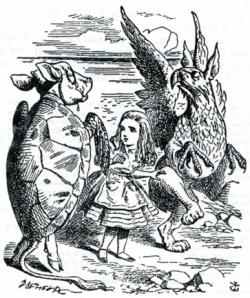






More information about bs4 & Beautifulsoup : [Beautiful Soup Documentation](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)


## 1 Objectives
Web scraping in Python is getting easy with Beautifulsoup and the following process may be applied to retrieve data :
- Make a request to the targeted url
- Transform the content of the request into a Beautifulsoup' object, named `soup`
- Navigate through the soup
- Identify and retrieve the needed data

##2 Make a request




###2.1 Import the librairies

In [1]:
import requests # access to url
from bs4 import BeautifulSoup # extract data from url
import pandas as pd #data wrangling

###2.2 A first request
The first step consists in making a request to the targeted url.  
In the following example we are going to extract main news of Le Monde, a French online newspaper.

In [2]:
url = 'https://www.tours.fr/'
print(url)

req = requests.get(url)
print(req)

https://www.tours.fr/
<Response [200]>


The request has several status :
- 1xx informational response – the request was received, continuing process
- 2xx successful – the request was successfully received, understood, and accepted
- 3xx redirection – further action needs to be taken in order to complete the request
- 4xx client error – the request contains bad syntax or cannot be fulfilled
- 5xx server error – the server failed to fulfil an apparently valid request

More information on [Wikipedia](https://en.wikipedia.org/wiki/List_of_HTTP_status_codes).

###2.3 Extract content
When the request is successful, extract content of the url is made easy from the `request` object.

In [3]:
req.text

'<!DOCTYPE html>\n<html lang="fr" >\n<head><meta charset="UTF-8" />\n<meta name="viewport" content="width=device-width, initial-scale=1.0, minimum-scale=1.0" />\n<meta http-equiv="X-UA-Compatible" content="ie=edge" />\n\n\t\t<link rel="preload" href="https://www.tours.fr/app/themes/stratis-site/fonts/Roboto/Roboto-Black.woff2" as="font" crossorigin="" />\n\t\t\t\t<link rel="preload" href="https://www.tours.fr/app/themes/stratis-site/fonts/Roboto/Roboto-BlackItalic.woff2" as="font" crossorigin="" />\n\t\t\t\t<link rel="preload" href="https://www.tours.fr/app/themes/stratis-site/fonts/Roboto/Roboto-Bold.woff2" as="font" crossorigin="" />\n\t\t\t\t<link rel="preload" href="https://www.tours.fr/app/themes/stratis-site/fonts/Roboto/Roboto-BoldItalic.woff2" as="font" crossorigin="" />\n\t\t\t\t<link rel="preload" href="https://www.tours.fr/app/themes/stratis-site/fonts/Roboto/Roboto-Italic.woff2" as="font" crossorigin="" />\n\t\t\t\t<link rel="preload" href="https://www.tours.fr/app/themes/s

###2.4 Other information
Many useful information is available from the `request` object, for instance :

In [4]:
print("Request' status : ", req.status_code)
print("Request' encoding : ", req.encoding)
print("Request' connection : ", req.connection)
print("Request' headers : ", req.headers)
print("Request' content : ", req.content)

Request' status :  200
Request' encoding :  UTF-8
Request' connection :  <requests.adapters.HTTPAdapter object at 0x7fc1b84b3a90>
Request' headers :  {'date': 'Tue, 26 Mar 2024 09:09:37 GMT', 'content-type': 'text/html; charset=UTF-8', 'vary': 'Accept-Encoding,Cookie', 'link': '<https://www.tours.fr/wp-json/>; rel="https://api.w.org/", <https://www.tours.fr/wp-json/wp/v2/pages/10>; rel="alternate"; type="application/json", <https://www.tours.fr/>; rel=shortlink', 'strict-transport-security': 'max-age=15768000', 'content-encoding': 'gzip', 'transfer-encoding': 'chunked', 'set-cookie': 'lb_9d93bac588a2044b966884a265428e62=i_0d895c4814923484bcf06125c6d9b2c3; path=/; HttpOnly', 'cache-control': 'private'}
Request' content :  b'<!DOCTYPE html>\n<html lang="fr" >\n<head><meta charset="UTF-8" />\n<meta name="viewport" content="width=device-width, initial-scale=1.0, minimum-scale=1.0" />\n<meta http-equiv="X-UA-Compatible" content="ie=edge" />\n\n\t\t<link rel="preload" href="https://www.tours

The `.content` attribute provides the full web page of the url.

###2.5 Troubleshootings
Let's imagine the web server requires more appropriate requets for accessing to the url.  
In that case a simple request, as made before, may not be successful.

###2.5.1 Error 406
The web server returns the "Error 406", that means :

> 406 Not Acceptable.  
The requested resource is capable of generating only content not acceptable according to the Accept headers sent in the request. (Source : [Wikipedia](https://en.wikipedia.org/wiki/List_of_HTTP_status_codes))


In [5]:
url_406="https://chucknorrisfacts.net/top-100"
print(url_406)

req = requests.get(url_406)
print(req)
print(req.content)

https://chucknorrisfacts.net/top-100
<Response [406]>
b'<head><title>Not Acceptable!</title></head><body><h1>Not Acceptable!</h1><p>An appropriate representation of the requested resource could not be found on this server. This error was generated by Mod_Security.</p><script>(function(){if (!document.body) return;var js = "window[\'__CF$cv$params\']={r:\'86a6016518672b74\',t:\'MTcxMTQ0NDIwNC41MTQwMDA=\'};_cpo=document.createElement(\'script\');_cpo.nonce=\'\',_cpo.src=\'/cdn-cgi/challenge-platform/scripts/jsd/main.js\',document.getElementsByTagName(\'head\')[0].appendChild(_cpo);";var _0xh = document.createElement(\'iframe\');_0xh.height = 1;_0xh.width = 1;_0xh.style.position = \'absolute\';_0xh.style.top = 0;_0xh.style.left = 0;_0xh.style.border = \'none\';_0xh.style.visibility = \'hidden\';document.body.appendChild(_0xh);function handler() {var _0xi = _0xh.contentDocument || _0xh.contentWindow.document;if (_0xi) {var _0xj = _0xi.createElement(\'script\');_0xj.innerHTML = js;_0xi.getE


A workaround consists in defining an header in the request in order to authenticate the user with a user agent.

In [6]:
url_406="https://chucknorrisfacts.net/top-100"
headers = {
    'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10.12; rv:55.0) Gecko/20100101 Firefox/55.0',
}

req_406 = requests.get(url, headers=headers)
print(req)
print(req.content)

<Response [406]>
b'<head><title>Not Acceptable!</title></head><body><h1>Not Acceptable!</h1><p>An appropriate representation of the requested resource could not be found on this server. This error was generated by Mod_Security.</p><script>(function(){if (!document.body) return;var js = "window[\'__CF$cv$params\']={r:\'86a6016518672b74\',t:\'MTcxMTQ0NDIwNC41MTQwMDA=\'};_cpo=document.createElement(\'script\');_cpo.nonce=\'\',_cpo.src=\'/cdn-cgi/challenge-platform/scripts/jsd/main.js\',document.getElementsByTagName(\'head\')[0].appendChild(_cpo);";var _0xh = document.createElement(\'iframe\');_0xh.height = 1;_0xh.width = 1;_0xh.style.position = \'absolute\';_0xh.style.top = 0;_0xh.style.left = 0;_0xh.style.border = \'none\';_0xh.style.visibility = \'hidden\';document.body.appendChild(_0xh);function handler() {var _0xi = _0xh.contentDocument || _0xh.contentWindow.document;if (_0xi) {var _0xj = _0xi.createElement(\'script\');_0xj.innerHTML = js;_0xi.getElementsByTagName(\'head\')[0].appendC

##3 Let's play with Beautifulsoup
###3.1 Make a soup
Transform the content of the request into a Beautifulsoup' object, named `soup`.  
**Make a (beautiful) soup** : get the content from your url.

In [7]:
url = 'https://www.tours.fr/'
req = requests.get(url)
soup = BeautifulSoup(req.text, "lxml")
soup

<!DOCTYPE html>
<html lang="fr">
<head><meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1.0, minimum-scale=1.0" name="viewport"/>
<meta content="ie=edge" http-equiv="X-UA-Compatible"/>
<link as="font" crossorigin="" href="https://www.tours.fr/app/themes/stratis-site/fonts/Roboto/Roboto-Black.woff2" rel="preload"/>
<link as="font" crossorigin="" href="https://www.tours.fr/app/themes/stratis-site/fonts/Roboto/Roboto-BlackItalic.woff2" rel="preload"/>
<link as="font" crossorigin="" href="https://www.tours.fr/app/themes/stratis-site/fonts/Roboto/Roboto-Bold.woff2" rel="preload"/>
<link as="font" crossorigin="" href="https://www.tours.fr/app/themes/stratis-site/fonts/Roboto/Roboto-BoldItalic.woff2" rel="preload"/>
<link as="font" crossorigin="" href="https://www.tours.fr/app/themes/stratis-site/fonts/Roboto/Roboto-Italic.woff2" rel="preload"/>
<link as="font" crossorigin="" href="https://www.tours.fr/app/themes/stratis-site/fonts/Roboto/Roboto-Light.woff2" rel="prelo

###3.2 The tree structure
The tree structure is easily available from the soup.

In [8]:
print(soup.prettify())

<!DOCTYPE html>
<html lang="fr">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1.0, minimum-scale=1.0" name="viewport"/>
  <meta content="ie=edge" http-equiv="X-UA-Compatible"/>
  <link as="font" crossorigin="" href="https://www.tours.fr/app/themes/stratis-site/fonts/Roboto/Roboto-Black.woff2" rel="preload"/>
  <link as="font" crossorigin="" href="https://www.tours.fr/app/themes/stratis-site/fonts/Roboto/Roboto-BlackItalic.woff2" rel="preload"/>
  <link as="font" crossorigin="" href="https://www.tours.fr/app/themes/stratis-site/fonts/Roboto/Roboto-Bold.woff2" rel="preload"/>
  <link as="font" crossorigin="" href="https://www.tours.fr/app/themes/stratis-site/fonts/Roboto/Roboto-BoldItalic.woff2" rel="preload"/>
  <link as="font" crossorigin="" href="https://www.tours.fr/app/themes/stratis-site/fonts/Roboto/Roboto-Italic.woff2" rel="preload"/>
  <link as="font" crossorigin="" href="https://www.tours.fr/app/themes/stratis-site/fonts/Roboto/Roboto-Lig

###3.3 The title of the page
The title has a dedicated attribute "title".

In [9]:
print(soup.title)
print(soup.title.string)

<title>Page d’accueil - Ville de Tours</title>
Page d’accueil - Ville de Tours


##4 Identify the required data
Let's imagine we want to retrieve the articles available on the main page and from the section 'Tours actualités'.  
By navigating on the web page or the tree structure, it's pretty easy to identify that :
- The section 'Tours actualités' owns the class `news-home__container`.
- The articles are contained in the section 'Tours actualités'and own the class `class="news-item"`.


###4.1 Retrieve one article
The `find()` method allows to extract the first data that meets the expectations.

In [18]:
article_1 = soup.find(class_="news-home__container").find(class_="news-item")
article_1

<article class="news-item">
<picture class="news-item__image" data-error-alt="Image cassée">
<img alt="" class="lazy lazyload" data-error-src="data:image/svg+xml,%3Csvg%20xmlns%3D%22http%3A%2F%2Fwww.w3.org%2F2000%2Fsvg%22%20width%3D%22454%22%20height%3D%22340%22%20viewBow%3D%220%200%20454%20340%22%20%20%2F%3E" data-src="https://www.tours.fr/app/uploads/2024/03/ramassage-megots-2024-454x340.jpg" height="340" src="data:image/svg+xml,%3Csvg%20xmlns%3D%22http%3A%2F%2Fwww.w3.org%2F2000%2Fsvg%22%20width%3D%22454%22%20height%3D%22340%22%20viewBow%3D%220%200%20454%20340%22%20%20%2F%3E" width="454"/>
</picture>
<div class="news-item__content">
<p class="theme is-decor news-item__category">Environnement,  Propreté urbaine</p>
<h3 class="item-title news-item__title">
<a class="underline" href="https://www.tours.fr/actualites/objectif-zero-megot/">Objectif Zéro Mégot</a>
</h3>
</div>
</article>

In [19]:
# This is equivalent, but without specifying the parent "news-home__container"
soup.find(class_="news-item")

<article class="news-item">
<picture class="news-item__image" data-error-alt="Image cassée">
<img alt="" class="lazy lazyload" data-error-src="data:image/svg+xml,%3Csvg%20xmlns%3D%22http%3A%2F%2Fwww.w3.org%2F2000%2Fsvg%22%20width%3D%22454%22%20height%3D%22340%22%20viewBow%3D%220%200%20454%20340%22%20%20%2F%3E" data-src="https://www.tours.fr/app/uploads/2024/03/ramassage-megots-2024-454x340.jpg" height="340" src="data:image/svg+xml,%3Csvg%20xmlns%3D%22http%3A%2F%2Fwww.w3.org%2F2000%2Fsvg%22%20width%3D%22454%22%20height%3D%22340%22%20viewBow%3D%220%200%20454%20340%22%20%20%2F%3E" width="454"/>
</picture>
<div class="news-item__content">
<p class="theme is-decor news-item__category">Environnement,  Propreté urbaine</p>
<h3 class="item-title news-item__title">
<a class="underline" href="https://www.tours.fr/actualites/objectif-zero-megot/">Objectif Zéro Mégot</a>
</h3>
</div>
</article>

####4.1.1 The title

In [30]:
title_1 = article_1.find(class_="item-title news-item__title").find("a").string
print(title_1)

Objectif Zéro Mégot


In [48]:
# Ad'hoc function
def get_title_from_article(article):
  title = article.find(class_="item-title news-item__title").find("a").string
  return(title)

get_title_from_article(article=article_1)

'Objectif Zéro Mégot'

####4.1.2 The weblink

In [32]:
weblink_1 = article_1.find(class_="item-title news-item__title").find("a").get(key="href")
print(weblink_1)

https://www.tours.fr/actualites/objectif-zero-megot/


In [49]:
# Ad'hoc function
def get_weblink_from_article(article):
  weblink = article.find(class_="item-title news-item__title").find("a").get(key="href")
  return(weblink)

get_weblink_from_article(article=article_1)

'https://www.tours.fr/actualites/objectif-zero-megot/'

####4.1.3 The image

In [66]:
image_1 = article_1.find(class_="news-item__image")#.find("img")#.get(key="data-src")
print(image_1)

<picture class="news-item__image" data-error-alt="Image cassée">
<img alt="" class="lazy lazyload" data-error-src="data:image/svg+xml,%3Csvg%20xmlns%3D%22http%3A%2F%2Fwww.w3.org%2F2000%2Fsvg%22%20width%3D%22454%22%20height%3D%22340%22%20viewBow%3D%220%200%20454%20340%22%20%20%2F%3E" data-src="https://www.tours.fr/app/uploads/2024/03/ramassage-megots-2024-454x340.jpg" height="340" src="data:image/svg+xml,%3Csvg%20xmlns%3D%22http%3A%2F%2Fwww.w3.org%2F2000%2Fsvg%22%20width%3D%22454%22%20height%3D%22340%22%20viewBow%3D%220%200%20454%20340%22%20%20%2F%3E" width="454"/>
</picture>


In [50]:
# Ad'hoc function
def get_image_from_article(article):
  image = article.find(class_="news-item__image").find("img").get(key="data-src")
  return(image)

get_image_from_article(article=article_1)

'https://www.tours.fr/app/uploads/2024/03/ramassage-megots-2024-454x340.jpg'

###4.2 Extract all articles
Now the `find_all()` method is applied and allows to extract all data that meets the expectations.

In [45]:
article_list = soup.find(class_="news-home__container").find_all(class_="news-item")
print(article_list)

[<article class="news-item">
<picture class="news-item__image" data-error-alt="Image cassée">
<img alt="" class="lazy lazyload" data-error-src="data:image/svg+xml,%3Csvg%20xmlns%3D%22http%3A%2F%2Fwww.w3.org%2F2000%2Fsvg%22%20width%3D%22454%22%20height%3D%22340%22%20viewBow%3D%220%200%20454%20340%22%20%20%2F%3E" data-src="https://www.tours.fr/app/uploads/2024/03/ramassage-megots-2024-454x340.jpg" height="340" src="data:image/svg+xml,%3Csvg%20xmlns%3D%22http%3A%2F%2Fwww.w3.org%2F2000%2Fsvg%22%20width%3D%22454%22%20height%3D%22340%22%20viewBow%3D%220%200%20454%20340%22%20%20%2F%3E" width="454"/>
</picture>
<div class="news-item__content">
<p class="theme is-decor news-item__category">Environnement,  Propreté urbaine</p>
<h3 class="item-title news-item__title">
<a class="underline" href="https://www.tours.fr/actualites/objectif-zero-megot/">Objectif Zéro Mégot</a>
</h3>
</div>
</article>, <article class="news-item">
<picture class="news-item__image" data-error-alt="Image cassée">
<img alt=

In [67]:
# Test iteration through the list of articles
print(article_list[0])

<article class="news-item">
<picture class="news-item__image" data-error-alt="Image cassée">
<img alt="" class="lazy lazyload" data-error-src="data:image/svg+xml,%3Csvg%20xmlns%3D%22http%3A%2F%2Fwww.w3.org%2F2000%2Fsvg%22%20width%3D%22454%22%20height%3D%22340%22%20viewBow%3D%220%200%20454%20340%22%20%20%2F%3E" data-src="https://www.tours.fr/app/uploads/2024/03/ramassage-megots-2024-454x340.jpg" height="340" src="data:image/svg+xml,%3Csvg%20xmlns%3D%22http%3A%2F%2Fwww.w3.org%2F2000%2Fsvg%22%20width%3D%22454%22%20height%3D%22340%22%20viewBow%3D%220%200%20454%20340%22%20%20%2F%3E" width="454"/>
</picture>
<div class="news-item__content">
<p class="theme is-decor news-item__category">Environnement,  Propreté urbaine</p>
<h3 class="item-title news-item__title">
<a class="underline" href="https://www.tours.fr/actualites/objectif-zero-megot/">Objectif Zéro Mégot</a>
</h3>
</div>
</article>


####4.2.1 The title

In [54]:
# With the dedicated function
for article in soup.find(class_="news-home__container").find_all(class_="news-item"):
  title = get_title_from_article(article=article)
  print(title)

Objectif Zéro Mégot
Assemblée des jeunes citoyennes et citoyens
Projet Égales


In [47]:
for article in soup.find(class_="news-home__container").find_all(class_="news-item"):
  title = article.find(class_="item-title news-item__title").find("a").string
  print(title)

Objectif Zéro Mégot
Assemblée des jeunes citoyennes et citoyens
Projet Égales


####4.2.2 The description

In [55]:
# With the dedicated function
for article in soup.find(class_="news-home__container").find_all(class_="news-item"):
  weblink = get_weblink_from_article(article=article)
  print(weblink)

https://www.tours.fr/actualites/objectif-zero-megot/
https://www.tours.fr/actualites/assemblee-des-jeunes-citoyennes-et-citoyens/
https://www.tours.fr/actualites/projet-egales/


####4.2.3 The image

In [56]:
# With the dedicated function
for article in soup.find(class_="news-home__container").find_all(class_="news-item"):
  image = get_image_from_article(article=article)
  print(image)

https://www.tours.fr/app/uploads/2024/03/ramassage-megots-2024-454x340.jpg
https://www.tours.fr/app/uploads/2024/03/AJC-40x60-V2-454x340.jpg
https://www.tours.fr/app/uploads/2024/03/20230130-Gil-KD-©-Ville-de-Tours-F.-Lafite-12-454x340.jpg


## 5 Store data
Let's imagine we want to extract all articles available on the main page, whatever their types : main, runner, older, etc.  
Another strategy is needed here for a such data extraction.  

###5.3 Extract all articles
Now the `find_all()` method is applied and allows to extract all data that meets the expectations.

In [59]:
list_title = []
list_weblink = []
list_image = []

for article in soup.find(class_="news-home__container").find_all(class_="news-item"):
  # Store items in list
  list_title.append(get_title_from_article(article=article))
  list_weblink.append(get_weblink_from_article(article=article))
  list_image.append(get_image_from_article(article=article))

In [60]:
list_image

['https://www.tours.fr/app/uploads/2024/03/ramassage-megots-2024-454x340.jpg',
 'https://www.tours.fr/app/uploads/2024/03/AJC-40x60-V2-454x340.jpg',
 'https://www.tours.fr/app/uploads/2024/03/20230130-Gil-KD-©-Ville-de-Tours-F.-Lafite-12-454x340.jpg']

### 5.4 Store articles in dataframe
For a better storing and readability, dataframe is a good data structure.

In [63]:
df = pd.DataFrame({'Title': list_title,
        'Weblink': list_weblink,
        'Image': list_image})
df

,Title,Weblink,Image
0,Objectif Zéro Mégot,https://www.tours.fr/actualites/objectif-zero-...,https://www.tours.fr/app/uploads/2024/03/ramas...
1,Assemblée des jeunes citoyennes et citoyens,https://www.tours.fr/actualites/assemblee-des-...,https://www.tours.fr/app/uploads/2024/03/AJC-4...
2,Projet Égales,https://www.tours.fr/actualites/projet-egales/,https://www.tours.fr/app/uploads/2024/03/20230...


## Ressources
- [Beautifulsoup documentation](https://www.crummy.com/software/BeautifulSoup/bs4/doc/index.html?highlight=href#)
- Tutorial [Real Python](https://realpython.com/beautiful-soup-web-scraper-python/)



---
Did you love it ? [Please visit my website](http://www.dcid-consulting.fr/) and lets' get in touch for special needs : consultancy, dedicated training, cut-in-the-edge development, etc.  
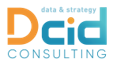Data science | Machine learning | Data analytics | Dataviz  